In [ ]:
from google.colab import drive
drive.mount("/content/drive" ,force_remount=True)

Mounted at /content/drive


In [ ]:
# for weather_dataset(11 class) ,weather_dataset2(4 class)

In [ ]:
DATA="/content/drive/MyDrive/thesis/weather_dataset_4"

In [ ]:
CLASS1 = ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
CLASS2 = ["cloudy","rain","shine","sunrise"]

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio( DATA, output="output4", seed=1337, ratio=(0.8, 0.1,0.1)) 

Copying files: 1101 files [00:04, 265.44 files/s]


In [ ]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import pickle

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation ,Input,Dropout,BatchNormalization
from keras.models import Model
from keras.regularizers import l2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
DIRECTORY = "/content/drive/MyDrive/thesis/weather_dataset_4"
#CATEGORIES = ['train', 'valid']
#CATEGORIES= ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
CATEGORIES= ["cloudy","rain","shine","sunrise"]

In [ ]:
IMG_SIZE =128

In [ ]:
data = []

In [ ]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    print(folder)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        if type(img_arr) is np.ndarray:
            if img_arr.size == 0:
                continue
        if img_arr is None:
          continue
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

/content/drive/MyDrive/thesis/weather_dataset_4/cloudy
/content/drive/MyDrive/thesis/weather_dataset_4/rain
/content/drive/MyDrive/thesis/weather_dataset_4/shine
/content/drive/MyDrive/thesis/weather_dataset_4/sunrise


In [ ]:
len(data),type(data)

(1099, list)

In [ ]:
random.shuffle(data)

In [ ]:
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.15,
                                   zoom_range = 0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   horizontal_flip =True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.15,
                                   zoom_range = 0.2,
                                    width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip =True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/output4/train",
                                                target_size=(128,128),
                                                batch_size= 16,
                                                  shuffle=True,
                                                 class_mode='categorical')

Found 879 images belonging to 4 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory("/content/output4/val",
                                                target_size=(128,128),
                                                batch_size= 16,
                                                 shuffle=False,
                                                class_mode='categorical')

Found 108 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/output4/test",
                                           target_size = (128,128),
                                           batch_size = 16,
                                            shuffle=False,
                                            class_mode='categorical')


Found 114 images belonging to 4 classes.


In [ ]:
input_shape=(128,128,3)


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors


model.add(Dense(2048, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1024, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

model.add(Dense(1024, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

# model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 activation_118 (Activation)  (None, 126, 126, 64)     0         
                                                                 
 conv2d_87 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 activation_119 (Activation)  (None, 124, 124, 64)     0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 60, 60, 128)       73856     
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0001),
              metrics=['accuracy', 'AUC'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(training_set,  epochs=100, validation_data = validation_set)


Epoch 1/100
55/55 [==============================] - 15s 243ms/step - loss: 5.8241 - accuracy: 0.5290 - auc: 0.8153 - val_loss: 4.8371 - val_accuracy: 0.5370 - val_auc: 0.8572
Epoch 2/100
55/55 [==============================] - 13s 234ms/step - loss: 3.9636 - accuracy: 0.7281 - auc: 0.9228 - val_loss: 3.4896 - val_accuracy: 0.7037 - val_auc: 0.9248
Epoch 3/100
55/55 [==============================] - 13s 233ms/step - loss: 3.1324 - accuracy: 0.7554 - auc: 0.9399 - val_loss: 2.9200 - val_accuracy: 0.7685 - val_auc: 0.9417
Epoch 4/100
55/55 [==============================] - 13s 232ms/step - loss: 2.7182 - accuracy: 0.7691 - auc: 0.9441 - val_loss: 2.7002 - val_accuracy: 0.7130 - val_auc: 0.9225
Epoch 5/100
55/55 [==============================] - 13s 234ms/step - loss: 2.4300 - accuracy: 0.7816 - auc: 0.9483 - val_loss: 2.3334 - val_accuracy: 0.8241 - val_auc: 0.9481
Epoch 6/100
55/55 [==============================] - 13s 235ms/step - loss: 2.2250 - accuracy: 0.8055 - auc: 0.9520 - va

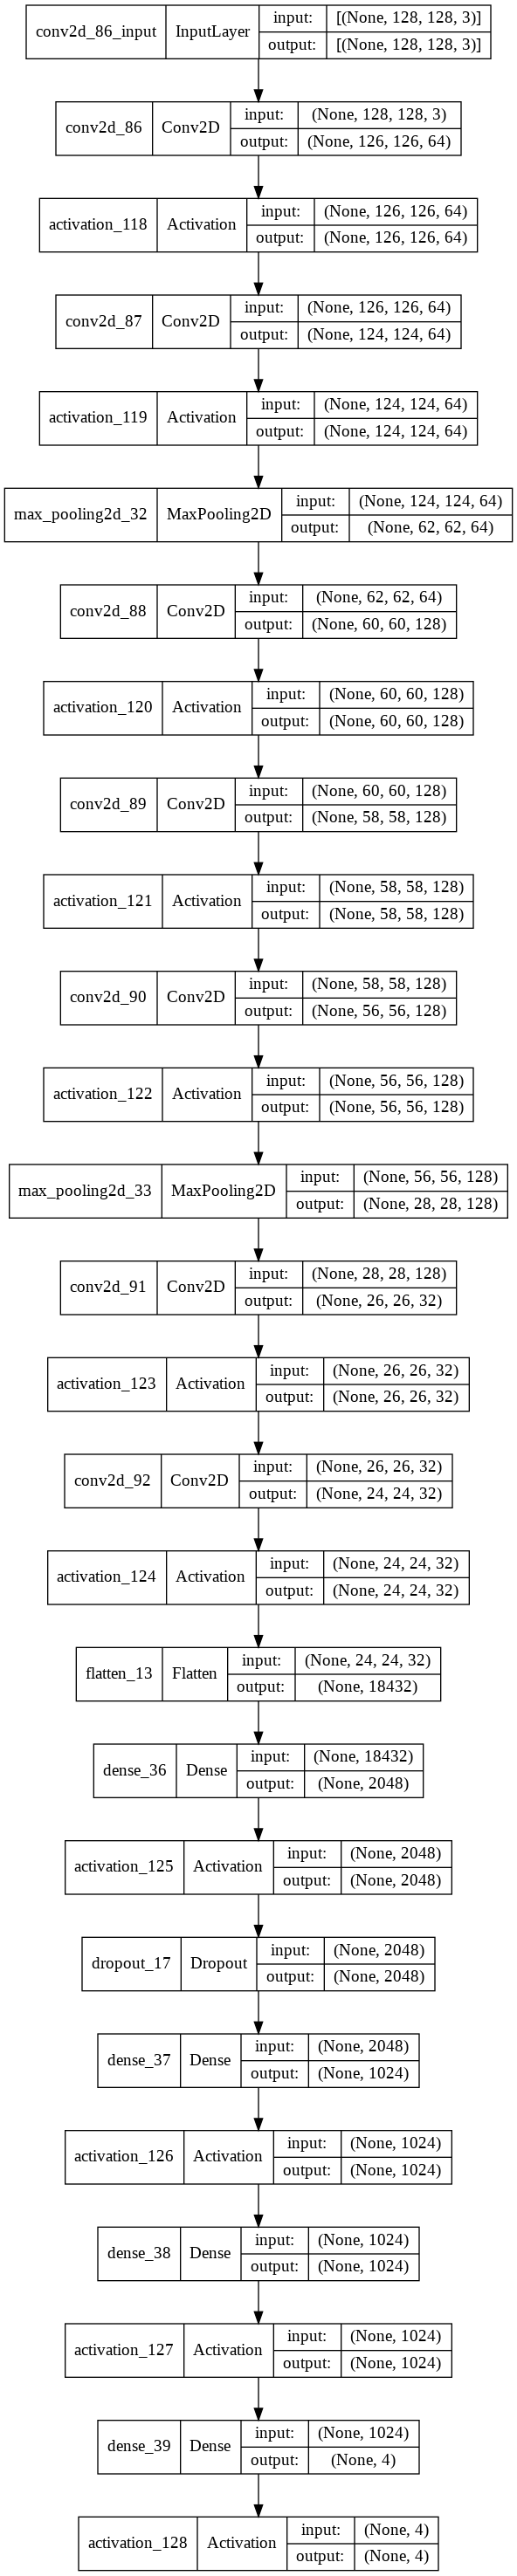

In [ ]:
from tensorflow import keras 
keras.utils.plot_model(model, "duagram.png",show_shapes=True)

In [ ]:
history.history

{'accuracy': [0.5290102362632751,
  0.7281001210212708,
  0.7554038763046265,
  0.7690557241439819,
  0.7815699577331543,
  0.8054607510566711,
  0.8077360391616821,
  0.8259385824203491,
  0.849829375743866,
  0.8452787399291992,
  0.8634812235832214,
  0.8657565712928772,
  0.8748577833175659,
  0.8930602669715881,
  0.8873720169067383,
  0.8680318593978882,
  0.8885096907615662,
  0.8850967288017273,
  0.8885096907615662,
  0.9067121744155884,
  0.8976109027862549,
  0.9203640222549438,
  0.9249146580696106,
  0.916951060295105,
  0.891922652721405,
  0.9010238647460938,
  0.8998862504959106,
  0.9237770438194275,
  0.8998862504959106,
  0.9101251363754272,
  0.9328782558441162,
  0.9260523319244385,
  0.916951060295105,
  0.939704179763794,
  0.9294652938842773,
  0.9317406415939331,
  0.9249146580696106,
  0.9237770438194275,
  0.9362912178039551,
  0.916951060295105,
  0.9271900057792664,
  0.914675772190094,
  0.9442548155784607,
  0.9249146580696106,
  0.9294652938842773,
  0.9

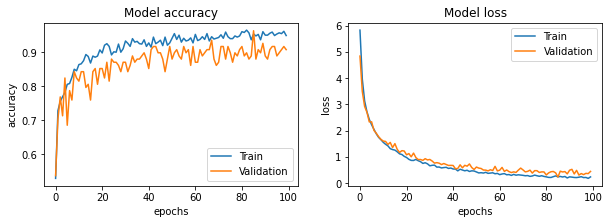

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])

In [ ]:
results = model.evaluate(validation_set, verbose=0)
    
print("    Validation Loss: {:.5f}".format(results[0]))
print("Validation Accuracy: {:.2f}%".format(results[1] * 100))

    Validation Loss: 0.29889
Validation Accuracy: 95.37%


In [ ]:
results = model.evaluate(test_set, verbose=0)
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.27288
Test Accuracy: 95.61%


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [ ]:
print('Confusion Matrix')
cm=confusion_matrix(test_set.classes, y_pred)
print(cm)


Confusion Matrix
[[28  0  1  1]
 [ 0 22  0  0]
 [ 2  0 24  0]
 [ 0  0  1 35]]


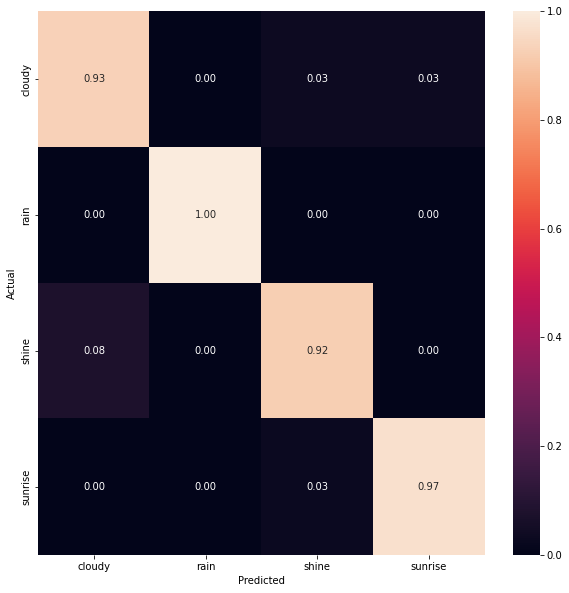

In [ ]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=CLASS2, yticklabels=CLASS2)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
print('Classification Report')
cr=classification_report(test_set.classes, y_pred, target_names=CLASS2)
print(cr)

Classification Report
              precision    recall  f1-score   support

      cloudy       0.93      0.93      0.93        30
        rain       1.00      1.00      1.00        22
       shine       0.92      0.92      0.92        26
     sunrise       0.97      0.97      0.97        36

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



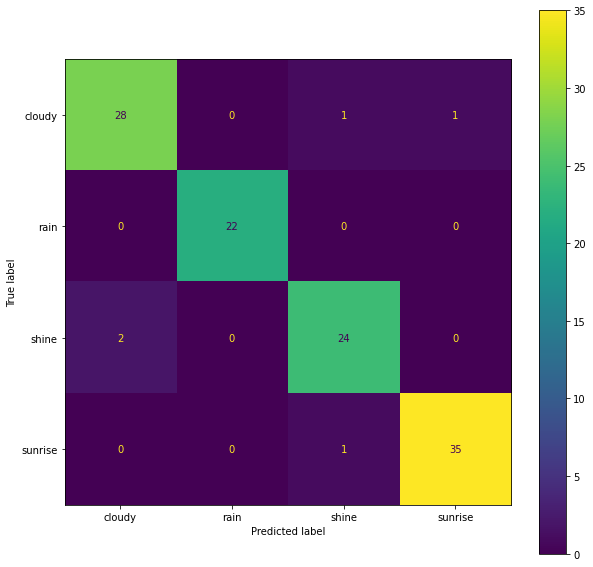

In [ ]:
l= np.array(CLASS2)
type(l)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,  display_labels=l )
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

plt.show()

In [ ]:
test= "/content/output4/test"
#labels = ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
labels = ["cloudy","rain","shine","sunrise"]
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
x_test = np.array(x)
y_test = np.array(y)

In [ ]:
y_test, y_pred, CLASS2

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3]),
 array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3]),
 ['cloudy', 'rain', 'shine', 'sunrise'])

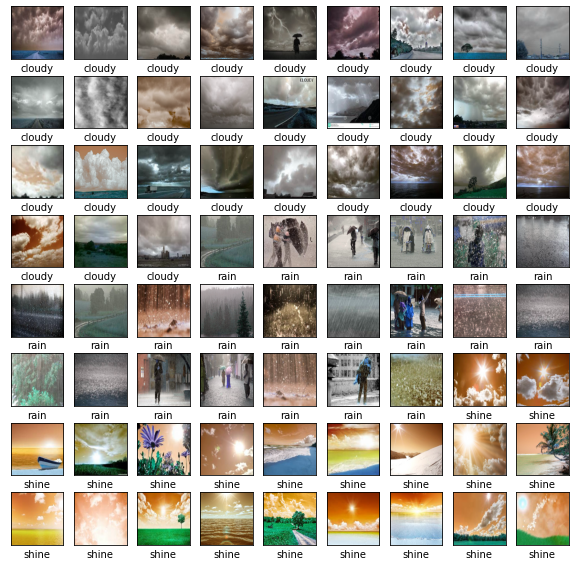

In [ ]:
plt.figure(figsize=(10,10))
for i in range(72):
    plt.subplot(8,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS2[y_test[i]])
plt.show()

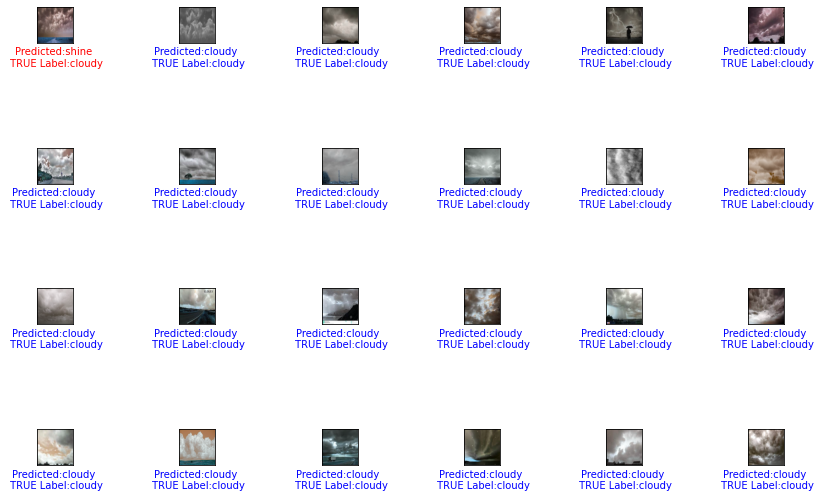

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(12, 8))
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols , 2*i+1)
  true_label = y_test[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  
  if y_pred[i] == y_test[i]:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted:{} \n TRUE Label:{}".format( CLASS2[y_pred[i]], CLASS2[y_test[i]]), color=color )
  
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
target=CLASS2

ROC AUC score: 0.9711593961593962


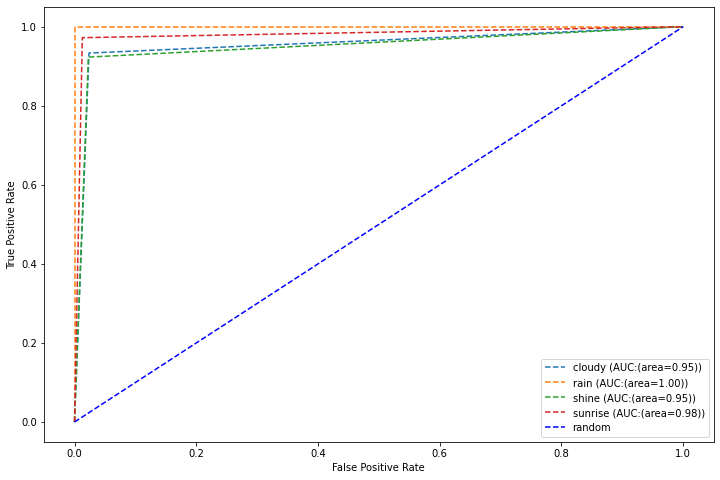

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,'--', label = '%s (AUC:(area=%0.2f))'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b--', label = 'random')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()    